In [ ]:
#Importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Installing the required libraries
!pip install python-docx
!pip install wikipedia
import pandas as pd
import numpy as np
import string as string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
nltk.download('stopwords')

     |████████████████████████████████| 5.6 MB 8.8 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=2d9761b1cf09b6ca334073bb2f9dd3094ee44690532e745089f6c26d2a6ddeff
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=9eec8dcf569e169b446d97a07b4bc4b35bddc6b9f43bdaeb1cc1863ae9e304d0
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Creating an empty dataframe
df = pd.DataFrame(columns = ['SL No','document'])
df


,SL No,document


In [ ]:
#Repository creation
#Run this after ur done

#Converting word docs to text and saving it into dataframe
from docx import Document

for i in range(100):
  document = Document(str(i+1)+'.docx')
  #print(document.paragraphs)
  doc_text=''
  for p in document.paragraphs:
    doc_text+=p.text
  print('-------------------------------------------------------------------')
  print(i+1)
  print('-------------------------------------------------------------------')
  print(doc_text)
  df = df.append({'SL No' : i+1, 'document':doc_text},ignore_index = True)

In [ ]:
print(df)

   SL No                                           document
0      1  A Hybrid Link Protection Scheme for Ensuring N...
1      2  2020 5th International Conference on Mechanica...
2      3  Computer Network Security of University and Pr...
3      4  2021 International Conference on Big Data Anal...
4      5  Design and Implementation of Linux Network Com...
..   ...                                                ...
95    96  Teaching the Basics of NLP and ML in an Introd...
96    97  How to Train Good Word Embeddings for Biomedic...
97    98  Polyglot: Distributed Word Representations for...
98    99  Available online at ScienceDirectProcedia Comp...
99   100  TextAttack: A Framework for Adversarial Attack...

[100 rows x 2 columns]


In [ ]:
df['document'][0]

'A Hybrid Link Protection Scheme for Ensuring Network Service Availability in Link-state Routing NetworksHaijun Geng, Han Zhang, Xingang Shi, Zhiliang Wang, Xia Yin, Ju Zhang, Zhiguo Hu, and Yong WuAbstract: The internet is playing an increasingly crucial role in both personal and business activities. In addition, with the emer- gence of real-time, delay sensitive and mission-critical applications, stringent network availability requirement is put forward for inter- net service providers (ISPs). However, commonly deployed intra- domain link-state routing protocols react to link failures by glob- ally exchanging link state advertisements and recalculating rout- ing table, inevitably causing significant forwarding discontinuity after a failure. Therefore, the loop-free criterion (LFC) approach has been widely deployed by many ISPs for coping with the single network component failure scenario in large internet backbones. The success of LFC lies in its inherent simplicity, but this comes a

In [ ]:
#Pre processing 

#Tokenisation
#Generate tokens for text
tokens = RegexpTokenizer(r'\w+')
#Case folding -> make all tokens lowercase
df['document'] = df['document'].apply(lambda x: tokens.tokenize(x.lower()))
df.head()

,SL No,document
0,1,"[a, hybrid, link, protection, scheme, for, ens..."
1,2,"[2020, 5th, international, conference, on, mec..."
2,3,"[computer, network, security, of, university, ..."
3,4,"[2021, international, conference, on, big, dat..."
4,5,"[design, and, implementation, of, linux, netwo..."


In [ ]:
# StopWord Removal- removal of articles and other common words 
stop_words = set(stopwords.words('english')) 
stop_words = stop_words.union(",","(",")","[","]","{","}","#","@","!",":",";",".","?")
df['document']=df['document'].apply(lambda x: [item for item in x if item not in stop_words])
df['document']
#After removal of words like a,an,the,just,about,etc...

0     [hybrid, link, protection, scheme, ensuring, n...
1     [2020, 5th, international, conference, mechani...
2     [computer, network, security, university, prev...
3     [2021, international, conference, big, data, a...
4     [design, implementation, linux, network, compu...
                            ...                        
95    [teaching, basics, nlp, ml, introductory, cour...
96    [train, good, word, embeddings, biomedical, nl...
97    [polyglot, distributed, word, representations,...
98    [available, online, sciencedirectprocedia, com...
99    [textattack, framework, adversarial, attacks, ...
Name: document, Length: 100, dtype: object

In [ ]:
#Stemming of tokens in texts
ps=PorterStemmer()
df['document']=df['document'].apply(lambda x: [ps.stem(item) for item in x])
df['document']

0     [hybrid, link, protect, scheme, ensur, network...
1     [2020, 5th, intern, confer, mechan, control, c...
2     [comput, network, secur, univers, prevent, str...
3     [2021, intern, confer, big, data, analysi, com...
4     [design, implement, linux, network, comput, sy...
                            ...                        
95    [teach, basic, nlp, ml, introductori, cours, i...
96    [train, good, word, embed, biomed, nlpbilli, c...
97    [polyglot, distribut, word, represent, multili...
98    [avail, onlin, sciencedirectprocedia, comput, ...
99    [textattack, framework, adversari, attack, dat...
Name: document, Length: 100, dtype: object

In [ ]:
def preproc_query(s):
    arr=[]
    stoplist = set(stopwords.words("english"))
    lst=s.split(' ')
    for i in lst:
        if i not in stoplist:
            i=ps.stem(i)
            i=i.lower()
            arr.append(i)
    return arr

In [ ]:
#Run this only after all docs are uploaded

# Inverted index
#Building an inverted index for the given text corpus
#Build a dictionary of words
#Non positional postings

inverted_index={}
count=1
for arr in df['document']:
    for words in arr:
        if words not in inverted_index:
            inverted_index[words]=[count]
        else:
            inverted_index[words].append(count)
    count+=1
    

for i in inverted_index:
    positions=inverted_index[i]
    inverted_index[i]=[len(positions),set(positions)]

print(inverted_index)


{'hybrid': [82, {1, 6, 11, 19, 20, 27, 28, 31, 33, 37, 38, 39, 43, 44, 46, 47, 49, 51, 54, 64, 72, 82, 83, 86, 87, 91, 95}], 'link': [548, {1, 4, 6, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 54, 56, 57, 58, 60, 62, 68, 72, 78, 81, 82, 85, 89, 90, 94, 95, 99}], 'protect': [511, {1, 2, 3, 4, 6, 7, 14, 15, 18, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 51, 53, 54, 55, 56, 57, 58, 67, 72, 76, 78, 83}], 'scheme': [167, {1, 3, 9, 21, 24, 25, 26, 27, 28, 31, 35, 39, 43, 45, 46, 47, 51, 58, 68, 72, 82, 91, 92, 99}], 'ensur': [391, {1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 14, 15, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 57, 58, 63, 67, 68, 72, 78, 83, 85, 93, 94, 97, 98, 99}], 'network': [3543, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30

In [ ]:
#BOOLEAN MODEL

def find(word):
    docs=[]
    if word not in inverted_index:
        print('NO DOCUMENT WITH SUCH WORD!!')
    else:
        for i in inverted_index[word][1]:
            docs.append(i)
    return set(docs)

#Boolean Query
#AND
def booleanQueryAnd(q1,q2):
    doclist1= find(q1)
    doclist2 = find(q2)
    result = [docid for docid in doclist1 if docid in doclist2]
    return result

#OR
def booleanQueryOr(q1,q2):
    doclist1 = find(q1)
    doclist2 = find(q2)
    result = doclist1.union(doclist2)
    return result


#TESTING THESE FUNCTIONS
#Run sample queries

In [ ]:
unique_words = []
for sentence in df['document']:
    for words in sentence:
        unique_words.extend(words.split(' '))
print(unique_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(unique_words))
print(unique_words[0:1000])

707212
['hybrid', 'link', 'protect', 'scheme', 'ensur', 'network', 'servic', 'avail', 'link', 'state', 'rout', 'networkshaijun', 'geng', 'han', 'zhang', 'xingang', 'shi', 'zhiliang', 'wang', 'xia', 'yin', 'ju', 'zhang', 'zhiguo', 'hu', 'yong', 'wuabstract', 'internet', 'play', 'increasingli', 'crucial', 'role', 'person', 'busi', 'activ', 'addit', 'emer', 'genc', 'real', 'time', 'delay', 'sensit', 'mission', 'critic', 'applic', 'stringent', 'network', 'avail', 'requir', 'put', 'forward', 'inter', 'net', 'servic', 'provid', 'isp', 'howev', 'commonli', 'deploy', 'intra', 'domain', 'link', 'state', 'rout', 'protocol', 'react', 'link', 'failur', 'glob', 'alli', 'exchang', 'link', 'state', 'advertis', 'recalcul', 'rout', 'ing', 'tabl', 'inevit', 'caus', 'signific', 'forward', 'discontinu', 'failur', 'therefor', 'loop', 'free', 'criterion', 'lfc', 'approach', 'wide', 'deploy', 'mani', 'isp', 'cope', 'singl', 'network', 'compon', 'failur', 'scenario', 'larg', 'internet', 'backbon', 'success', 

In [ ]:
#NOTE: WILL TAKE VERY LONG TO RUN : DON'T QUIT TILL CELL IS RUN COMPLETELY

#Positional postings
#Positional index

positional_index = {}

for word in list(set(unique_words)):
    res = []
    positional_index[word] = [unique_words.count(word)]
    for i in range(0,df.shape[0]):
        d= {} 
        d[i] = []
        if word in df['document'][i]:
            wordslist = df['document'][i]
            d[i].extend([pos+1 for pos in range(len(wordslist)) if wordslist[pos]==word ])
            res.append(d)
    positional_index[word].extend(res)
        
print(positional_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(positional_index['ml'])

[604, {24: [1218, 1232, 1295, 1656, 2347, 2450, 2665, 2775, 2822, 3516, 3539, 3689, 3703, 3725, 3736, 3791, 3798, 3837, 3855, 4000, 4019, 4044, 4051, 4061, 4106, 4125, 4179, 4203, 4265, 4275, 4298, 4328, 4330, 4438, 4481, 4491, 4529, 4567, 4586, 4604, 4614, 4632, 4697, 4731, 4736, 4758, 4790, 4836, 4848, 4856, 4871, 4873, 5317, 7621, 8230, 9248, 9620, 9665, 9864, 10659, 10727, 10825, 11081, 11150, 11537, 12631, 12859, 13819, 13964, 14249, 14266, 14285, 14793, 17983, 18004, 18022, 18757, 19643, 19965, 21567, 22153, 22165, 22186, 23382, 23737, 23779, 23790, 23865, 24372, 24446, 25463, 25477, 26540, 26760, 26787, 31531]}, {25: [14379, 14388, 14487]}, {28: [330, 681, 682, 717, 746, 780, 819, 904, 981, 985, 1007, 1028, 1100, 1104, 1491, 1730, 3081, 3103, 3288, 3295, 3417, 5650, 5654]}, {29: [3292]}, {32: [1518, 1532, 1972, 2209, 4202, 4609, 5481, 5495, 10943, 15658, 15755, 15845, 15880, 16032, 16067, 16103, 16113, 16150, 16562, 16569, 16592, 16610, 16807, 16828, 16837, 16853, 16866, 16888, 

In [ ]:
#Phrase query
#To find list of documents

def phraseQuery(phrase):
    count=0
    for item in phrase:
        result={}
        if item not in positional_index.keys():
            print('No docs found!')
            break
        else:
            inside_dictionary = positional_index[item][1]

        if len(result) == 0 :
            result = inside_dictionary
        else:
            doc_list = list(set(result.keys()) & set(inside_dictionary.keys()))
            temp_dic = {}

            for doc in doc_list :
                temp_dic[doc] = result[doc]    
            result = {}    
            result = temp_dic
            if len(doc_list) == 0:
                print("No documents")
                break

            for doc in doc_list :

                list_posting = result[doc]
                temp_pos = []

                for pos in list_posting:

                    if pos+count in inside_dictionary[doc]:
                        temp_pos.append(pos)

                result[doc] = temp_pos

                if len(result[doc]) == 0 :
                    del result[doc]

        count = count + 1

    print("List of Documents retrived are :",result)

# check a document and fill words in the array
#phraseQuery(['','','']) # fill with words

In [ ]:
phraseQuery(preproc_query('hybrid link protect scheme') )

List of Documents retrived are : {0: [4, 132, 143, 549, 563, 578, 635, 645, 703, 725, 745, 833, 844, 957, 1053, 1164, 1451, 1456, 1568, 1602, 1668, 1690, 1709, 1738, 1990, 2138, 2571, 2586, 5869, 6055, 6117, 6301, 6326, 6339, 6583, 6647, 6695, 6738, 6821, 7574, 7601]}


In [ ]:
phraseQuery(preproc_query('textattack'))

List of Documents retrived are : {99: [1, 62, 74, 86, 100, 118, 136, 252, 333, 392, 399, 400, 432, 444, 460, 473, 491, 500, 530, 584, 729, 742, 763, 778, 846, 855, 872, 899, 935, 951, 957, 984, 1002, 1015, 1048, 1104, 1123, 1136, 1138, 1145, 1168, 1189, 1194, 1234, 1237, 1248, 1343, 1344, 1389, 1440, 1492, 1520, 1548, 1558, 1572, 1650, 1660, 1669, 1706, 1708, 1727, 1754, 2599, 2607, 2672, 2740, 2861, 2922, 2949, 3048, 3063, 3098, 3187, 3315, 3325, 3331, 3341, 3396, 3421, 3432, 3447, 3452, 3462, 3475]}


In [ ]:
phraseQuery(preproc_query('polyglot') )

List of Documents retrived are : {97: [1]}


In [ ]:
phraseQuery(preproc_query('some crap'))

No docs found!
List of Documents retrived are : {}


In [ ]:
print(list(find('nlp')))
print(list(find('iot')))
print('------------NLP and IOT------------')
res_list=list(booleanQueryAnd('nlp','iot'))
print(res_list)

[22, 24, 25, 26, 29, 33, 34, 35, 36, 37, 43, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[24, 25, 27, 28, 29, 30, 31, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 92]
------------NLP and IOT------------
[24, 25, 29, 36, 37, 43, 92]


In [ ]:
print(booleanQueryAnd('hybrid','link'))
print(booleanQueryOr('hybrid','link'))

[1, 6, 11, 19, 20, 27, 28, 31, 33, 37, 38, 39, 43, 44, 54, 72, 82, 95]
{1, 4, 6, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 54, 56, 57, 58, 60, 62, 64, 68, 72, 78, 81, 82, 83, 85, 86, 87, 89, 90, 91, 94, 95, 99}


In [ ]:
#Document text contents
doc_list=[]
for i in df['document']:
  s=''
  for j in i:
    s=s+' '+j
  doc_list.append(s)

print(doc_list[0])
print(doc_list[1])

 hybrid link protect scheme ensur network servic avail link state rout networkshaijun geng han zhang xingang shi zhiliang wang xia yin ju zhang zhiguo hu yong wuabstract internet play increasingli crucial role person busi activ addit emer genc real time delay sensit mission critic applic stringent network avail requir put forward inter net servic provid isp howev commonli deploy intra domain link state rout protocol react link failur glob alli exchang link state advertis recalcul rout ing tabl inevit caus signific forward discontinu failur therefor loop free criterion lfc approach wide deploy mani isp cope singl network compon failur scenario larg internet backbon success lfc lie inher simplic come expens let certain failur scenario go unprotect achiev full failur coverag lfc without incur signif icant extra overhead propos novel link protect scheme hybrid link protect hlp achiev failur resili rout compar previou scheme hlp ensur high network avail abil effici way hlp implement two sta

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Doc2Vec and Relevance Ranking
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

doc = []
## Exapmple document (list of sentences)

for i in res_list:
  doc.append(doc_list[i-1])
print(doc[0])
print('--------')
print(doc[1])

print('__________________________________________________________________')

# Tokenization of each document
tokenized_doc = []
for d in doc:
    tokenized_doc.append(word_tokenize(d.lower()))
tokenized_doc

tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data

## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
model.save("test_doc2vec.model")
## Load saved doc2vec model
model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
model.wv.vocab

test_doc = word_tokenize("".lower())
model.docvecs.most_similar(positive=[model.infer_vector(test_doc)],topn=5)

 artifici intelligencemarch 2018what ai machin learn cognit analyt term relat differ one anoth gener term ai refer broad field scienc encompass comput scienc also psycholog philosophi linguist area artifici intellig contentscontents03artifici intellig artifici intellig definedartifici intellig definedth topic artifici intellig top hype curve1 mani good reason excit promis bit scari time variou public claim ai know want buy creat netflix seri could cure cancer may eventu take job even destroy mankind 2the problem time opportun ai well defin would show navig system car someon live 1980 would probabl consid form artifici intellig wherea nowaday would probabl see speech imag recognit natur languag recognit game engin technolog becom common embed everi day technolog hand variou technolog solut provid take opportun rebrand exist solut ai take advantag huge hype market experienc result press coverag built machin learn model predict customerdemand solut exist year would call data mine past see

[(1, 0.224742591381073),
 (3, 0.09710048884153366),
 (0, 0.03514160215854645),
 (4, 0.02043551206588745),
 (6, -0.03189361095428467)]

# New Section

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
doc_lst = doc_list
X = vectorizer.fit_transform(doc_lst)

In [ ]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0000', '00000', '00000000although', '000003', '00001962', '00001974', '00001975', '00001981', '00001996', '00002010', '00002015', '00002016', '000056', '00005th', '00009physic', '0000chapter', '0000figur', '0000punec', '0001', '00010', '00012', '00015', '0001senat', '0002', '00020', '00020accuraci', '00025', '0003', '00030', '0004', '00040', '000410031', '0005', '00050', '000500', '00050002020', '0005000figur', '00050020010050201052112', '0006', '0008', '00080060040020002011', '0008006004002000figur', '000categori', '000day', '000figur', '000note', '000number', '000photo', '000prioriti', '000sourc', '000stage', '000sub', '000total', '000ugray', '000verizon', '001', '0010', '00101', '0010111001', '00107', '0011the', '00136a', '001govern', '001tel', '002', '0022', '0022002714530431k', '0022002715587048j', '002approv', '002ed', '002tel', '003', '0031', '00331a', '0035', '0036', '0037', '0038fig', '00397', '00399', '004', '0041', '0042', '0043', '00433', '005', '0050', '0051

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


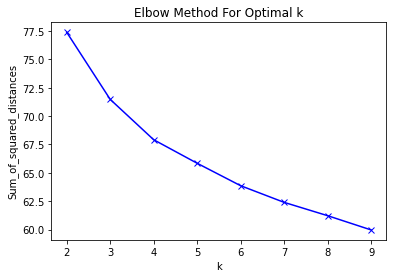

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
title=['Machine Learning','Artifical Intelligence','IoT','Networks and Security','Natural language processing']
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
0             Machine Learning        1
1       Artifical Intelligence        1
2                          IoT        1
3        Networks and Security        1
4  Natural language processing        1


Cluster: 0
Titles
Series([], )


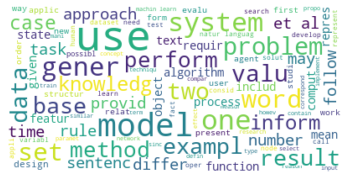

Cluster: 1
Titles
           Machine Learning
     Artifical Intelligence
                        IoT
      Networks and Security
Natural language processing


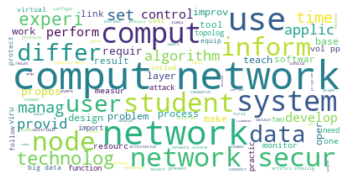

Cluster: 2
Titles
Series([], )


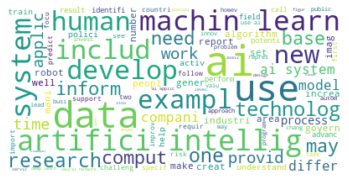

Cluster: 3
Titles
Series([], )


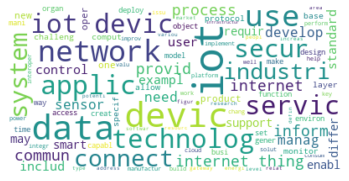

Cluster: 4
Titles
Series([], )


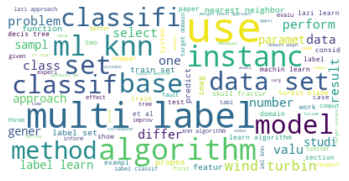

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':doc_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [ ]:
# Alternative way for document repo --> Wikipedia
#The same code is run on wikipedia docs with our domains and (few extra domains) to show hard clustering

In [ ]:
import pandas as pd
import wikipedia
articles=['Data Science','Artificial intelligence',
          'European Central Bank','Financial technology','International Monetary Fund',
          'Basketball','Swimming']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  European Central Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
examine content


['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [ ]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0001', '001', '0026', '003', '0030', '0036', '0040', '007', '0094', '011', '011082', '012', '013', '019', '0190', '01900692', '0198', '02', '03384', '04521', '0464', '0465065707', '05', '05830', '06', '06681', '0692', '07', '0706', '08', '08153', '08813', '0893', '09', '09540090310001655110', '10', '100', '1002', '100450', '1007', '100k', '101', '1013298507114', '1016', '10168773', '1017', '1023', '1039480085', '105', '106', '1080', '1083694322', '108771', '1093', '10m', '11', '110', '1109', '1110727808', '11229402', '1124', '1126', '113', '1131', '114', '1145', '115', '11573548', '1162', '117', '11715509', '1197', '11v', '12', '120', '1202', '121', '122', '1228', '123', '125', '1259433', '126', '127', '13', '1309', '1332', '133646', '134777', '1350', '14', '1404', '143', '143452957', '144', '145', '1452734', '145b', '149', '1498103', '14987656', '14th', '15', '150', '1500', '151', '1513681', '153', '1538', '1561', '1563803', '158829602', '16', '160', '1606', '1609', '16

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


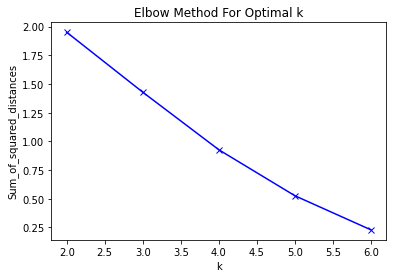

In [ ]:
Sum_of_squared_distances = []
K = range(2,7)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
6                     Swimming        0
5                   Basketball        1
0                 Data Science        2
3         Financial technology        3
1      Artificial intelligence        4
2        European Central Bank        5
4  International Monetary Fund        5


Cluster: 0
Titles
Swimming


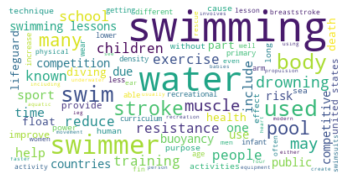

Cluster: 1
Titles
Basketball


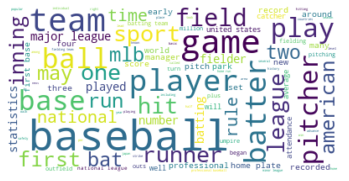

Cluster: 2
Titles
Data Science


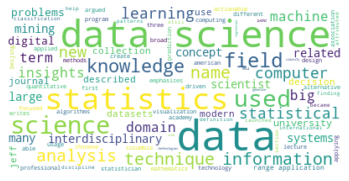

Cluster: 3
Titles
Financial technology


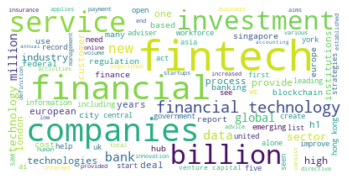

Cluster: 4
Titles
Artificial intelligence


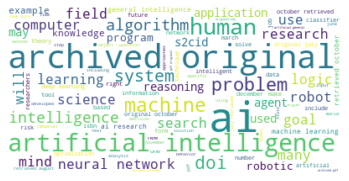

Cluster: 5
Titles
      European Central Bank
International Monetary Fund


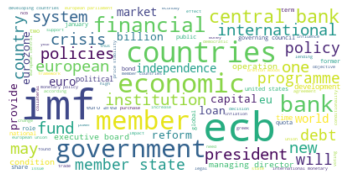

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
#Data Visualisation

#getting doc text
def get_doc_n_text(n):
    doc_n=Document(str(n)+'.docx')
    s=''
    for p in doc_n.paragraphs:
        s=s+p.text+' '
    return s


In [ ]:
doc_10 = get_doc_n_text(10)
print(doc_10)

   Learning Computer Network with Auxiliary Software  Chunmiao Yuan School of Computer Science & Software Tianjin Polytechnic University Tianjin China     Abstract—Computer network course is a fundamental course for the computer major college student which explains the architecture of network based on TCP/IP. But because the course is abstract in some degree, it’s hard for students to understand. We propose a learning method that utilizes the auxiliary software to simulate the network topology and configure the network protocols for the students to understand and analyze the learned network knowledge in time. After practicing for several years, we find this method is very helpful for student to study computer network course.  Keywords-computer network teaching; simulation software; network monitoring software  INTRODUCTION Computer network is a fundamental course for the computer major college student which explains the origin and development of the computer network, the architecture o

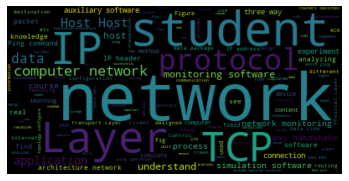

In [ ]:
text = doc_10
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#From the above visualisation we can be sure that the document belongs to Networks domain